## Libraries user guides
PyPortfolioOpt: https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html
Numpy: https://numpy.org/doc/stable/user/index.html#user
Pandas: https://pandas.pydata.org/docs/user_guide/index.html


In [26]:
# Import all libraries we need
import numpy as np
import pandas as pd
import pypfopt
import matplotlib.pyplot as plt
#check out whether pyfolio might be of help https://github.com/quantopian/pyfolio/tree/master/pyfolio/examples

In [27]:
## In this block we define functions we call repeatedly later
raw_prices_d= pd.read_excel("data for exam 2023.xlsx", sheet_name="stocks daily")

## This function takes as input the dataframe as provided by the exam data and outputs a dataframe with stock tickers as column
## column labels and timestamps as row labels, as required by PyPfOpt
## Pretty sure this function has some redundant lines
def clean_dataframe(df):
    df.rename(columns={np.nan:'Date'}, inplace=True)
    df.iloc[0,0] = 'Date'
    df.columns = df.iloc[0]
    df.drop([0,1], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    #df = df.astype(float)
    return df

## Takes a dataframe as input and returns a dataframe with the descriptive statistics (mean, var, std, skew, kurt)
def descriptive_stats(df):
    means = df.mean(axis=0)
    stds = df.std(axis=0)
    variance = df.var(axis=0)
    skew = df.skew(axis=0)
    kurt = df.kurt(axis=0)
    stats = {'Mean' : means, 'Standard Deviation': stds, 'Variance': variance, 'Skewness':skew, 'Kurtosis':kurt}
    stats_df = pd.DataFrame(data=stats)
    return stats_df

def portfolio_returns(df, weights, port):
    df[port+' Returns'] = pd.Series(0,index=df.index,dtype='float64') 
    for i in weights.keys():
        df[port+' Returns']+= df[i]*weights.get(i)
    return pd.DataFrame(df[port+' Returns'])




In [28]:
#Load daily Italian stocks data
#The index should consist of dates or timestamps, and each column should represent the time series of prices for an asset
raw_prices_d= pd.read_excel("data for exam 2023.xlsx", sheet_name="stocks daily")
prices_d = clean_dataframe(raw_prices_d)

raw_prices_m = pd.read_excel("data for exam 2023.xlsx", sheet_name="stocks monthly")
prices_m = clean_dataframe(raw_prices_m)

In [29]:
##Constructing the dataframe with daily returns to do some descriptive statistics on that
pct_returns_d = prices_d.pct_change(1)
pct_returns_m = prices_m.pct_change(1)

In [30]:
##1. Compute mean, standard deviation, variance, skewness and kurtosis for stocks at daily and monthly frequency. Show the results in a table and comment.
stats_d = descriptive_stats(pct_returns_d)
stats_d.to_excel('descriptive statistics d.xlsx')

stats_m = descriptive_stats(pct_returns_m)
stats_m.to_excel('descriptive statistics m.xlsx')



In [31]:
##2. Compute the variance-covariance matrix and the correlation matrix
cov_mat = pypfopt.risk_models.sample_cov(prices_d)
corr_mat = pypfopt.risk_models.cov_to_corr(cov_mat)
cov_mat.to_excel('covariance matrix.xlsx')
corr_mat.to_excel('correlation matrix.xlsx')

In [32]:
exclusion = ['I:PIRL','I:ILLB','I:SPAC','I:EQUI','I:IG','I:ENAV','I:PST','I:GAMB','I:AST','I:DEA','I:BIM','I:BOR','I:CASS']
#stocks with nan or delisted

In [33]:
## Find pairs that have correlation below a certain threshold
threshold = 0.07
for i in corr_mat.columns:
    for j in corr_mat.columns:
        if corr_mat[i][j] < threshold and i not in exclusion and j not in exclusion:
            print('Pair '+i+' '+j+' has correlation '+str(corr_mat[i][j]))
        else:
            continue
            


Pair I:ECK I:LRZ has correlation 0.06946535562810022
Pair I:ECK I:PINF has correlation 0.05059919411879345
Pair I:ECK I:CALT has correlation 0.06199489043529807
Pair I:ECK I:TRN has correlation 0.06051789968588873
Pair I:ECK I:ENV has correlation 0.017650495141530838
Pair I:ECK I:CLT has correlation 0.04775731192219021
Pair I:ECK I:AMP has correlation 0.0673084658044491
Pair I:ECK I:RCS has correlation 0.048516435389183224
Pair I:ECK I:MON has correlation 0.01992454471316008
Pair I:ECK I:SRG has correlation 0.04650769675515894
Pair I:ECK I:REC has correlation 0.05065606093637506
Pair I:ECK I:RN has correlation 0.053245201086349975
Pair I:ECK I:BRI has correlation 0.05809042294127941
Pair I:ECK I:FUL has correlation 0.04681615889089577
Pair I:ECK I:SSL has correlation 0.04571414079853552
Pair I:ECK I:CLE has correlation 0.03937748331151078
Pair I:ECK I:B has correlation 0.035825559221683484
Pair I:ECK I:ITM has correlation 0.0392999123317488
Pair I:ECK I:ZUC has correlation 0.0107289046

In [34]:
##3. Select a sample made of 10-12 securities.
stocks = ['I:ECK', 'I:CLT', 'I:ARN', 'I:HER', 'I:ELN', 'I:AMP', 'I:VIN', 'I:SSL', 'I:ITM', 'I:EDNR', 'I:FUL', 'I:MON']
select_d = prices_d.filter(stocks, axis=1)
select_m = prices_m.filter(stocks, axis=1)

In [35]:
select_ret_d=select_d.pct_change(1)
select_ret_m=select_m.pct_change(1)

In [36]:
stats_sel_d = descriptive_stats(select_ret_d)
stats_sel_d.to_excel('selected descriptive statistics d.xlsx')

stats_sel_m = descriptive_stats(select_ret_m)
stats_sel_m.to_excel('selected descriptive statistics m.xlsx')

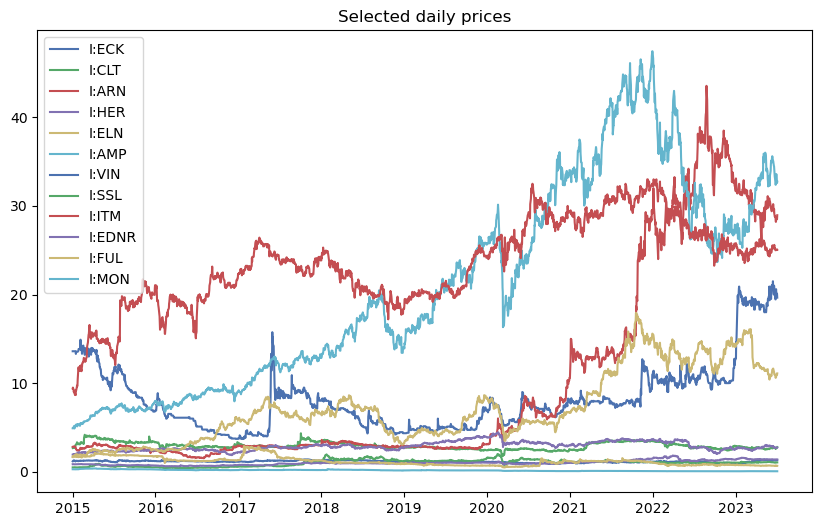

In [37]:
##4. Plot the behavior of the security prices you have chosen, both in daily and monthly frequency during the entire lenght of the sample size.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for i in select_d.columns:
    plt.plot(select_d[i], label=i)
plt.title('Selected daily prices')
plt.legend()

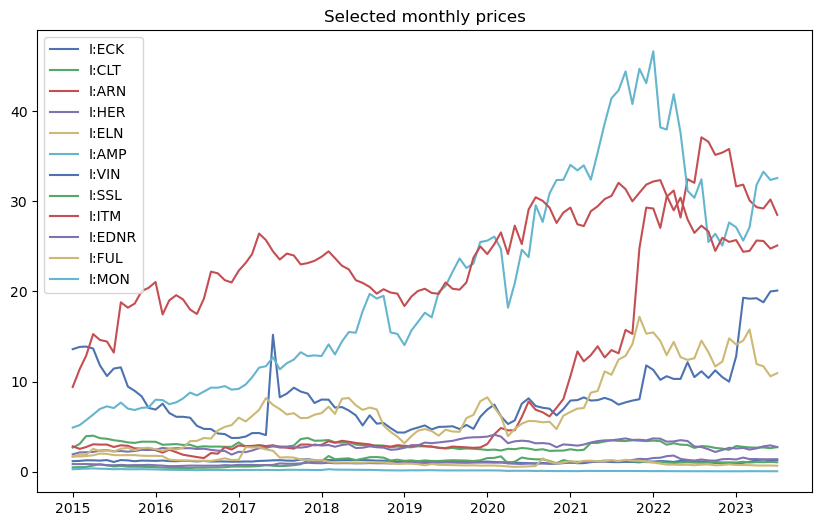

In [38]:
#monthly plots
plt.figure(figsize=(10,6))
for i in select_d.columns:
    plt.plot(select_m[i], label=i)
plt.title('Selected monthly prices')
plt.legend()

In [39]:
##5-6. Mean variance optimal portfolio allocation for sample chosen
from pypfopt.expected_returns import mean_historical_return
mu_d = mean_historical_return(select_d) #daily expected returns
S_d = pypfopt.risk_models.sample_cov(select_d) #daily vcv matr

mu_m = mean_historical_return(select_m, frequency=12) #monthly expected returns
S_m = pypfopt.risk_models.sample_cov(select_m, frequency=12) #monthly vcv matr


from pypfopt.efficient_frontier import EfficientFrontier

ef_d_l = EfficientFrontier(mu_d, S_d) #efficient frontier, daily, constrained
w_d_l = ef_d_l.max_sharpe()
cw_d_l = ef_d_l.clean_weights()
ef_d_l.save_weights_to_file("ef_d_l.csv")
print(cw_d_l)
exp_ret_d_l, exp_vol_d_l, sr_d_l = ef_d_l.portfolio_performance(verbose = True)

ef_m_l = EfficientFrontier(mu_m, S_m) #efficient frontier, monthly, constrained
w_m_l = ef_m_l.max_sharpe()
cw_m_l = ef_m_l.clean_weights()
ef_m_l.save_weights_to_file("ef_m_l.csv")
print(cw_m_l)
exp_ret_m_l, exp_vol_m_l, sr_m_l = ef_m_l.portfolio_performance(verbose = True)


OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.34106), ('I:HER', 0.0), ('I:ELN', 0.21414), ('I:AMP', 0.35237), ('I:VIN', 0.0), ('I:SSL', 0.0), ('I:ITM', 0.09243), ('I:EDNR', 0.0), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 25.1%
Annual volatility: 23.8%
Sharpe Ratio: 0.97
OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.30022), ('I:HER', 0.0), ('I:ELN', 0.09354), ('I:AMP', 0.50634), ('I:VIN', 0.0), ('I:SSL', 0.0), ('I:ITM', 0.0999), ('I:EDNR', 0.0), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 25.6%
Annual volatility: 23.5%
Sharpe Ratio: 1.00


In [40]:
ef_d_s = EfficientFrontier(mu_d, S_d, weight_bounds=(-1,1)) #efficient frontier, daily, unconstrained
w_d_s = ef_d_s.max_sharpe() 
cw_d_s = ef_d_s.clean_weights()
ef_d_s.save_weights_to_file("ef_d_s.csv")
print(cw_d_s)
exp_ret_d_s, exp_vol_d_s, sr_d_s = ef_d_s.portfolio_performance(verbose = True)

ef_m_s = EfficientFrontier(mu_m, S_m, weight_bounds=(-1,1)) #efficient frontier, monthly, unconstrained
w_m_s = ef_m_s.max_sharpe()
cw_m_s = ef_m_s.clean_weights()
ef_m_s.save_weights_to_file("ef_m_s.csv")
print(cw_m_s)
exp_ret_m_s, exp_vol_m_s, sr_m_s = ef_m_s.portfolio_performance(verbose = True)


OrderedDict([('I:ECK', -0.01865), ('I:CLT', -0.30836), ('I:ARN', 0.90248), ('I:HER', -0.70313), ('I:ELN', 0.67947), ('I:AMP', 1.0), ('I:VIN', -0.04911), ('I:SSL', 0.09774), ('I:ITM', 0.49361), ('I:EDNR', -0.04303), ('I:FUL', -0.29342), ('I:MON', -0.75761)])
Expected annual return: 86.8%
Annual volatility: 69.1%
Sharpe Ratio: 1.23
OrderedDict([('I:ECK', -0.00721), ('I:CLT', -0.18813), ('I:ARN', 0.39525), ('I:HER', -0.15492), ('I:ELN', 0.31714), ('I:AMP', 0.7588), ('I:VIN', 0.23868), ('I:SSL', 0.095), ('I:ITM', 0.48396), ('I:EDNR', 0.0663), ('I:FUL', -0.00487), ('I:MON', -1.0)])
Expected annual return: 63.1%
Annual volatility: 44.7%
Sharpe Ratio: 1.37


In [41]:
##7. Given previous results, compute mean, standard deviations, variance, skewness and kurtosis
## of your optimal mean-variance portfolios, both for daily and monthly frequency.

select_ret_d=select_d.pct_change(1)
select_ret_m=select_m.pct_change(1)
d_l_returns = portfolio_returns(select_ret_d, w_d_l, 'Daily Long Portfolio') #daily long portfolio returns
stats_d_l_returns = descriptive_stats(d_l_returns)

m_l_returns = portfolio_returns(select_ret_m, w_m_l, 'Monthly Long Portfolio') #monthly long portfolio returns
stats_m_l_returns = descriptive_stats(m_l_returns)

d_s_returns = portfolio_returns(select_ret_d, w_d_s, 'Daily Short Portfolio') #daily short portfolio returns
stats_d_s_returns = descriptive_stats(d_s_returns)

m_s_returns = portfolio_returns(select_ret_m, w_m_s, 'Monthly Short Portfolio') #monthly short portfolio returns
stats_m_s_returns = descriptive_stats(m_s_returns)

all_port_returns = pd.concat([stats_d_l_returns, stats_m_l_returns, stats_d_s_returns, stats_m_s_returns], axis=0)
all_port_returns.to_excel('mv portfolio_returns_statistics.xlsx')

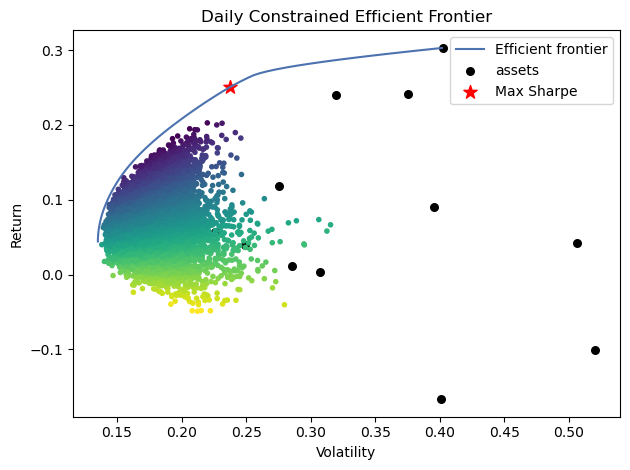

In [42]:
##8. Plot the efficient frontier for both daily and monthly frequency.

## The efficient frontier portfolio source code has been taken from the user guide of PyPortfolioOpt.
## Daily, constrained
from pypfopt import plotting
ef = EfficientFrontier(mu_d, S_d, weight_bounds=(0, 1))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Daily Constrained Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

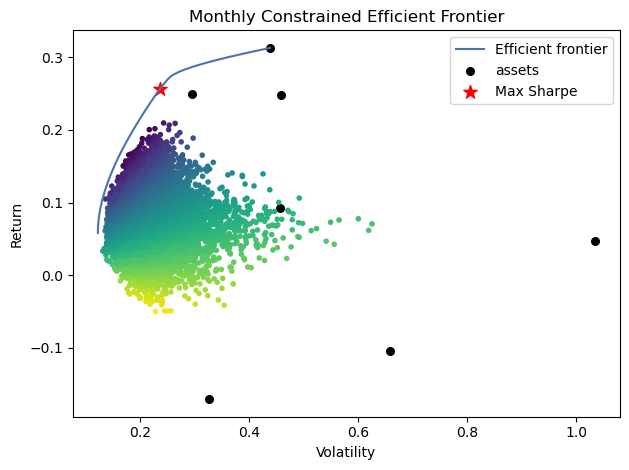

In [43]:
## Monhtly, constrained
ef1 = EfficientFrontier(mu_m, S_m, weight_bounds=(0, 1))
fig, ax = plt.subplots()
ef_max_sharpe_mo = ef1.deepcopy()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe_mo.max_sharpe()
ret_tangent_mo, std_tangent_mo, _ = ef_max_sharpe_mo.portfolio_performance()
ax.scatter(std_tangent_mo, ret_tangent_mo, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w_mo = np.random.dirichlet(np.ones(ef1.n_assets), n_samples)
rets_mo = w.dot(ef1.expected_returns)
stds_mo = np.sqrt(np.diag(w @ ef1.cov_matrix @ w.T))
sharpes_mo = rets_mo / stds_mo
ax.scatter(stds_mo, rets_mo, marker=".", c=sharpes_mo, cmap="viridis_r")

# Output
ax.set_title("Monthly Constrained Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

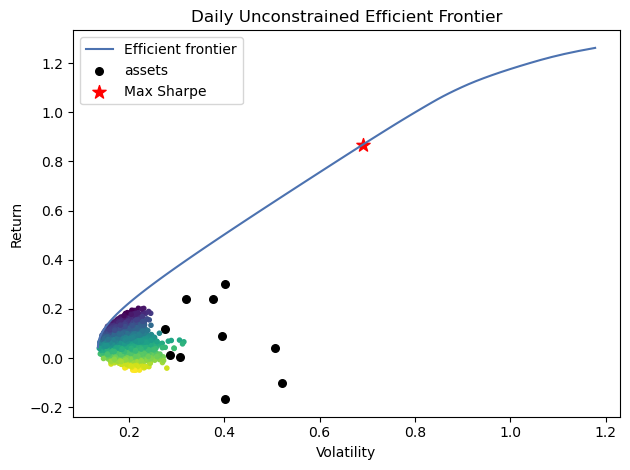

In [44]:
## Daily, unconstrained
ef2 = EfficientFrontier(mu_d, S_d, weight_bounds=(-1, 1))
fig, ax = plt.subplots()
ef2_max_sharpe = ef2.deepcopy()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)

# Find the tangency portfolio
ef2_max_sharpe.max_sharpe()
ret2_tangent, std2_tangent, _ = ef2_max_sharpe.portfolio_performance()
ax.scatter(std2_tangent, ret2_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w2 = np.random.dirichlet(np.ones(ef2.n_assets), n_samples)
rets2 = w.dot(ef2.expected_returns)
stds2 = np.sqrt(np.diag(w @ ef2.cov_matrix @ w.T))
sharpes2 = rets2 / stds2
ax.scatter(stds2, rets2, marker=".", c=sharpes2, cmap="viridis_r")

# Output
ax.set_title("Daily Unconstrained Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

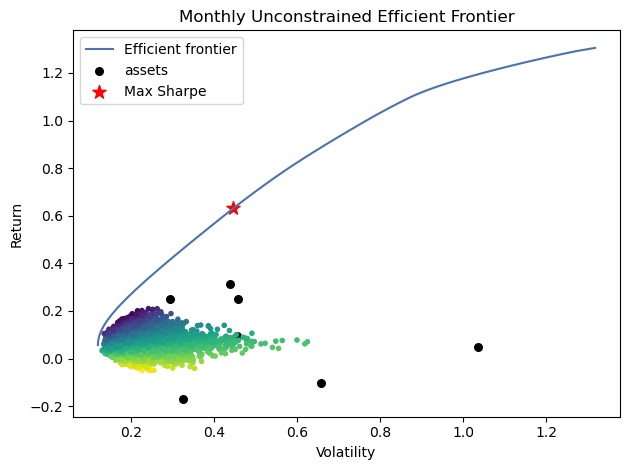

In [45]:
## Monthly, unconstrained
ef3 = EfficientFrontier(mu_m, S_m, weight_bounds=(-1, 1))
fig, ax = plt.subplots()
ef3_max_sharpe = ef3.deepcopy()
plotting.plot_efficient_frontier(ef3, ax=ax, show_assets=True)

# Find the tangency portfolio
ef3_max_sharpe.max_sharpe()
ret3_tangent, std3_tangent, _ = ef3_max_sharpe.portfolio_performance()
ax.scatter(std3_tangent, ret3_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w3 = np.random.dirichlet(np.ones(ef3.n_assets), n_samples)
rets3 = w.dot(ef3.expected_returns)
stds3 = np.sqrt(np.diag(w @ ef3.cov_matrix @ w.T))
sharpes3 = rets3 / stds3
ax.scatter(stds3, rets3, marker=".", c=sharpes3, cmap="viridis_r")

# Output
ax.set_title("Monthly Unconstrained Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [49]:
##10. Black Litterman model

#FUL -15%
#AMP +10%
#EDNR +3 ARN%
#ITM +4 VIN%

Q = np.array([-0.15, 0.10, 0.03, 0.04]).reshape(-1, 1) #view matrix

P = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0],
    ]
) #picking matrix

#estimate black litterman returns and vcv
bl_d=pypfopt.black_litterman.BlackLittermanModel(S_d, pi=mu_d, absolute_views=None, Q=Q, P=P, omega='default') #daily
bl_rets_d = bl_d.bl_returns()
bl_cov_d = bl_d.bl_cov()

bl_m=pypfopt.black_litterman.BlackLittermanModel(S_m, pi=mu_m, absolute_views=None, Q=Q, P=P, omega='default') #monthly
bl_rets_m = bl_m.bl_returns()
bl_cov_m = bl_m.bl_cov()

efbl_d_l = EfficientFrontier(bl_rets_d, bl_cov_d) #daily, constrained
blw_d_l = efbl_d_l.max_sharpe()
blcw_d_l = efbl_d_l.clean_weights()
efbl_d_l.save_weights_to_file("efbl_d_l.csv")
print(blcw_d_l)
efbl_d_l.portfolio_performance(verbose = True)

efbl_m_l = EfficientFrontier(bl_rets_m, bl_cov_m) #monthly, constrained
blw_m_l = efbl_m_l.max_sharpe()
blcw_m_l = efbl_m_l.clean_weights()
efbl_m_l.save_weights_to_file("efbl_m_l.csv")
print(blcw_m_l)
efbl_m_l.portfolio_performance(verbose = True)

efbl_d_s = EfficientFrontier(bl_rets_d, bl_cov_d, weight_bounds=(-1,1)) #daily, unconstrained
blw_d_s = efbl_d_s.max_sharpe()
blcw_d_s = efbl_d_s.clean_weights()
efbl_d_s.save_weights_to_file("efbl_d_s.csv")
print(blcw_d_s)
efbl_d_s.portfolio_performance(verbose = True)

efbl_m_s = EfficientFrontier(bl_rets_m, bl_cov_m, weight_bounds=(-1,1)) #monthly, unconstrained
blw_m_s = efbl_m_s.max_sharpe()
blcw_m_s = efbl_m_s.clean_weights()
efbl_m_s.save_weights_to_file("efbl_m_s.csv")
print(blcw_m_s)
efbl_m_s.portfolio_performance(verbose = True)

#compute all statistics
bl_d_l_ret = portfolio_returns(select_ret_d, blcw_d_l, 'Daily Long BL')
stats_bl_port_d_l = descriptive_stats(bl_d_l_ret)

bl_m_l_ret = portfolio_returns(select_ret_m, blcw_m_l, 'Monthly Long BL')
stats_bl_port_m_l = descriptive_stats(bl_m_l_ret)

bl_d_s_ret = portfolio_returns(select_ret_d, blcw_d_s, 'Daily Short BL')
stats_bl_port_d_s = descriptive_stats(bl_d_s_ret)

bl_m_s_ret = portfolio_returns(select_ret_m, blcw_m_s, 'Monthly Short BL')
stats_bl_port_m_s = descriptive_stats(bl_m_s_ret)

bl_stats = pd.concat([stats_bl_port_d_l, stats_bl_port_m_l, stats_bl_port_d_s, stats_bl_port_m_s], axis=0)
bl_stats.to_excel('black litterman portfolio stats.xlsx')

OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.24646), ('I:HER', 0.0), ('I:ELN', 0.32447), ('I:AMP', 0.30969), ('I:VIN', 0.0), ('I:SSL', 0.0), ('I:ITM', 0.0976), ('I:EDNR', 0.02178), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 17.3%
Annual volatility: 23.7%
Sharpe Ratio: 0.64
OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.20585), ('I:HER', 0.0), ('I:ELN', 0.14212), ('I:AMP', 0.48356), ('I:VIN', 0.0), ('I:SSL', 0.0), ('I:ITM', 0.052), ('I:EDNR', 0.11647), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 15.7%
Annual volatility: 22.2%
Sharpe Ratio: 0.62
OrderedDict([('I:ECK', -0.02169), ('I:CLT', -0.42464), ('I:ARN', 0.67889), ('I:HER', -0.99737), ('I:ELN', 0.93334), ('I:AMP', 1.0), ('I:VIN', 0.08545), ('I:SSL', 0.1359), ('I:ITM', 0.55989), ('I:EDNR', 0.53102), ('I:FUL', -0.48078), ('I:MON', -1.0)])
Expected annual return: 80.7%
Annual volatility: 80.6%
Sharpe Ratio: 0.98
OrderedDict([('I:ECK', -0.00923), ('I:CLT', -0.17238), ('I:ARN', 0.18305), (

In [50]:
##13. Pure Bayesian
## Building prior arrays
mu_arr_d = mu_d.to_numpy()
S_arr_d = S_d.to_numpy()
mu_pr_d = mu_arr_d + np.sqrt(np.diag(S_arr_d)) #daily mean prior
S_pr_d = S_arr_d * 2 #daily vcv prior

mu_arr_m = mu_m.to_numpy()
S_arr_m = S_m.to_numpy()
mu_pr_m = mu_arr_m + np.sqrt(np.diag(S_arr_m)) #monthly mean prior
S_pr_m = S_arr_m * 2 #monthly vcv prior

#Constructing predictive parameters
T=len(mu_d)
num_mu_po_d = np.matmul(T*np.linalg.inv(S_arr_d), mu_arr_d) + np.matmul(np.linalg.inv(S_pr_d), mu_pr_d)
sigma_po_d = np.linalg.inv(T*np.linalg.inv(S_arr_d) + np.linalg.inv(S_pr_d))
mu_po_d = np.matmul(sigma_po_d, num_mu_po_d) #daily predictive mean
sigma_pred_d = sigma_po_d + S_arr_d #daily predictive vcv

sigma_pred_d_df = pd.DataFrame(sigma_pred_d, index = S_d.index, columns=S_d.columns)
mu_po_d_df = pd.Series(mu_po_d, index=mu_d.index)

sigma_pred_d_df.to_excel('variance covariance predictive.xlsx', sheet_name='daily')
mu_po_d_df.to_excel('mean predictive.xlsx', sheet_name='daily')

num_m_po_m = np.matmul(T*np.linalg.inv(S_arr_m), mu_arr_m) + np.matmul(np.linalg.inv(S_pr_m), mu_pr_m)
sigma_po_m = np.linalg.inv(T*np.linalg.inv(S_arr_m) + np.linalg.inv(S_pr_m))
mu_po_m = np.matmul(sigma_po_m, num_m_po_m) #monthly predictive mean
sigma_pred_m = sigma_po_m + S_arr_m #monthly predictive vcv

sigma_pred_m_df = pd.DataFrame(sigma_pred_m, index = S_m.index, columns=S_m.columns)
mu_po_m_df = pd.Series(mu_po_m, index=mu_m.index)

sigma_pred_m_df.to_excel('variance covariance predictive.xlsx', sheet_name='monthly')
mu_po_m_df.to_excel('mean predictive.xlsx', sheet_name= 'monthly')

In [51]:
#Calculating efficient portfolios
efbay_d_l = EfficientFrontier(mu_po_d_df, sigma_pred_d_df) #daily, constrained
bayw_d_l = efbay_d_l.max_sharpe()
baycw_d_l = efbay_d_l.clean_weights()
efbay_d_l.save_weights_to_file("efbay_d_l.csv")
print(baycw_d_l)
efbay_d_l.portfolio_performance(verbose = True)

efbay_m_l = EfficientFrontier(mu_po_m_df, sigma_pred_m_df) #monthly, constrained
bayw_m_l = efbay_m_l.max_sharpe()
baycw_m_l = efbay_m_l.clean_weights()
efbay_m_l.save_weights_to_file("efbay_m_l.csv")
print(baycw_m_l)
efbay_m_l.portfolio_performance(verbose = True)

efbay_d_s = EfficientFrontier(mu_po_d_df, sigma_pred_d_df, weight_bounds=(-1,1)) #daily, unconstrained
bayw_d_s = efbay_d_s.max_sharpe()
baycw_d_s = efbay_d_s.clean_weights()
efbay_d_s.save_weights_to_file("efbay_d_s.csv")
print(baycw_d_s)
efbay_d_s.portfolio_performance(verbose = True)

efbay_m_s = EfficientFrontier(mu_po_m_df, sigma_pred_m_df, weight_bounds=(-1,1)) #monthly, unconstrained
bayw_m_s = efbay_m_s.max_sharpe()
baycw_m_s = efbay_m_s.clean_weights()
efbay_m_s.save_weights_to_file("efbay_m_s.csv")
print(baycw_m_s)
efbay_m_s.portfolio_performance(verbose = True)

bay_d_l_ret = portfolio_returns(select_ret_d, baycw_d_l, 'Daily Long Bay')
stats_bay_port_d_l = descriptive_stats(bay_d_l_ret)

bay_m_l_ret = portfolio_returns(select_ret_m, baycw_m_l, 'Monthly Long Bay')
stats_bay_port_m_l = descriptive_stats(bay_m_l_ret)

bay_d_s_ret = portfolio_returns(select_ret_d, baycw_d_s, 'Daily Short Bay')
stats_bay_port_d_s = descriptive_stats(bay_d_s_ret)

bay_m_s_ret = portfolio_returns(select_ret_m, baycw_m_s, 'Monthly Short Bay')
stats_bay_port_m_s = descriptive_stats(bay_m_s_ret)


bay_stats = pd.concat([stats_bay_port_d_l, stats_bay_port_m_l, stats_bay_port_d_s, stats_bay_port_m_s], axis=0)
bay_stats.to_excel('bayesian portfolio stats.xlsx')

OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.33343), ('I:HER', 0.0), ('I:ELN', 0.21194), ('I:AMP', 0.34265), ('I:VIN', 0.0), ('I:SSL', 0.00495), ('I:ITM', 0.10704), ('I:EDNR', 0.0), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 26.2%
Annual volatility: 24.4%
Sharpe Ratio: 0.99
OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.0), ('I:ARN', 0.29695), ('I:HER', 0.0), ('I:ELN', 0.09723), ('I:AMP', 0.49255), ('I:VIN', 0.0), ('I:SSL', 0.0), ('I:ITM', 0.11327), ('I:EDNR', 0.0), ('I:FUL', 0.0), ('I:MON', 0.0)])
Expected annual return: 26.8%
Annual volatility: 24.3%
Sharpe Ratio: 1.02
OrderedDict([('I:ECK', 0.00273), ('I:CLT', -0.26614), ('I:ARN', 0.81701), ('I:HER', -0.65609), ('I:ELN', 0.60657), ('I:AMP', 0.94777), ('I:VIN', -0.02867), ('I:SSL', 0.10104), ('I:ITM', 0.43582), ('I:EDNR', -0.06444), ('I:FUL', -0.24156), ('I:MON', -0.65403)])
Expected annual return: 80.0%
Annual volatility: 64.8%
Sharpe Ratio: 1.20
OrderedDict([('I:ECK', 0.00468), ('I:CLT', -0.16518), ('I:ARN', 0.3

In [52]:
##14. Global Min Variance portfolio and statistics

ef_gmv_d_l = EfficientFrontier(mu_d, S_d,weight_bounds=(0,1)) #daily, constrained
w_gmv_d_l = ef_gmv_d_l.min_volatility()
ef_gmv_d_l.save_weights_to_file("w_gmv_d_l.csv")
print(w_gmv_d_l)
ef_gmv_d_l.portfolio_performance(verbose = True)

ef_gmv_m_l = EfficientFrontier(mu_m, S_m,weight_bounds=(0,1)) #monthly, constrained
w_gmv_m_l = ef_gmv_m_l.min_volatility()
ef_gmv_m_l.save_weights_to_file("w_gmv_m_l.csv")
print(w_gmv_m_l)
ef_gmv_m_l.portfolio_performance(verbose = True)

ef_gmv_d_s = EfficientFrontier(mu_d, S_d,weight_bounds=(-1,1)) #daily, unconstrained
w_gmv_d_s = ef_gmv_d_s.min_volatility()
ef_gmv_d_s.save_weights_to_file("w_gmv_d_s.csv")
print(w_gmv_d_s)
ef_gmv_d_s.portfolio_performance(verbose = True)

ef_gmv_m_s = EfficientFrontier(mu_m, S_m,weight_bounds=(-1,1)) #monthly, unconstrained
w_gmv_m_s = ef_gmv_m_s.min_volatility()
ef_gmv_m_s.save_weights_to_file("w_gmv_m_s.csv")
print(w_gmv_m_s)
ef_gmv_m_s.portfolio_performance(verbose = True)


gmv_d_l_ret = portfolio_returns(select_ret_d, w_gmv_d_l, 'Daily Long GMV')
stats_gmv_port_d_l = descriptive_stats(gmv_d_l_ret)

gmv_m_l_ret = portfolio_returns(select_ret_m, w_gmv_m_l, 'Monthly Long GMV')
stats_gmv_port_m_l = descriptive_stats(gmv_m_l_ret)

gmv_d_s_ret = portfolio_returns(select_ret_d, w_gmv_d_s, 'Daily Short GMV')
stats_gmv_port_d_s = descriptive_stats(gmv_d_s_ret)

gmv_m_s_ret = portfolio_returns(select_ret_m, w_gmv_m_s, 'Monthly Short GMV')
stats_gmv_port_m_s = descriptive_stats(gmv_m_s_ret)

gmv_stats = pd.concat([stats_gmv_port_d_l, stats_gmv_port_m_l, stats_gmv_port_d_s, stats_gmv_port_m_s], axis=0)
gmv_stats.to_excel('gmv portfolio stats.xlsx')

OrderedDict([('I:ECK', 0.0495755775197231), ('I:CLT', 0.0963931471004527), ('I:ARN', 0.0337064644133124), ('I:HER', 0.107745331377921), ('I:ELN', 0.0028202007697847), ('I:AMP', 0.0463691531823682), ('I:VIN', 0.2012158113790776), ('I:SSL', 0.0414210607799633), ('I:ITM', 0.1174694647708424), ('I:EDNR', 0.1956519561655404), ('I:FUL', 0.0345670339217971), ('I:MON', 0.0730647986192173)])
Expected annual return: 4.4%
Annual volatility: 13.5%
Sharpe Ratio: 0.18
OrderedDict([('I:ECK', 0.0), ('I:CLT', 0.1248484774076676), ('I:ARN', 0.0229532817367204), ('I:HER', 0.0928273105574842), ('I:ELN', 0.0), ('I:AMP', 0.0709730432376415), ('I:VIN', 0.2690046371537499), ('I:SSL', 0.0), ('I:ITM', 0.0764900006373534), ('I:EDNR', 0.31764394857168), ('I:FUL', 0.0252593006977031), ('I:MON', 0.0)])
Expected annual return: 5.8%
Annual volatility: 12.2%
Sharpe Ratio: 0.31
OrderedDict([('I:ECK', 0.0495755775197231), ('I:CLT', 0.0963931471004527), ('I:ARN', 0.0337064644133124), ('I:HER', 0.107745331377921), ('I:ELN

In [53]:
##15. Mixed Portfolio
cw_d_l_ser=pd.Series(cw_d_l)
cw_m_l_ser=pd.Series(cw_m_l)
cw_d_s_ser=pd.Series(cw_d_s)
cw_m_s_ser=pd.Series(cw_m_s)

w_gmv_d_l_ser=pd.Series(w_gmv_d_l)
w_gmv_m_l_ser=pd.Series(w_gmv_m_l)
w_gmv_d_s_ser=pd.Series(w_gmv_d_s)
w_gmv_m_s_ser=pd.Series(w_gmv_m_s)

blcw_d_l_ser=pd.Series(blcw_d_l)
blcw_m_l_ser=pd.Series(blcw_m_l)
blcw_d_s_ser=pd.Series(blcw_d_s)
blcw_m_s_ser=pd.Series(blcw_m_s)

baycw_d_l_ser=pd.Series(baycw_d_l)
baycw_m_l_ser=pd.Series(baycw_m_l)
baycw_d_s_ser=pd.Series(baycw_d_s)
baycw_m_s_ser=pd.Series(baycw_m_s)

        

In [54]:
tot_port_columns = ['MV', 'BL', 'Bayes', 'GMV']
daily_long = pd.DataFrame([cw_d_l_ser, blcw_d_l_ser, baycw_d_l_ser, w_gmv_d_l_ser]).T
daily_long['Average of allocations'] = daily_long.mean(axis=1)
tw_d_l = daily_long['Average of allocations'].to_dict()
daily_long['Average of allocations'].to_excel('daily long weights.xlsx')

In [55]:
monthly_long = pd.DataFrame([cw_m_l_ser, blcw_m_l_ser, baycw_m_l_ser, w_gmv_m_l_ser]).T
monthly_long['Average of allocations'] = monthly_long.mean(axis=1)
tw_m_l = monthly_long['Average of allocations'].to_dict()
monthly_long['Average of allocations'].to_excel('monthly long weights.xlsx')

In [56]:
daily_short = pd.DataFrame([cw_d_s_ser, blcw_d_s_ser, baycw_d_s_ser, w_gmv_d_s_ser]).T
daily_short['Average of allocations'] = daily_short.mean(axis=1)
tw_d_s = daily_short['Average of allocations'].to_dict()
daily_short['Average of allocations'].to_excel('daily short weights.xlsx')

In [57]:
monthly_short = pd.DataFrame([cw_m_s_ser, blcw_m_s_ser, baycw_m_s_ser, w_gmv_m_s_ser]).T
monthly_short['Average of allocations'] = monthly_short.mean(axis=1)
tw_m_s = monthly_short['Average of allocations'].to_dict()
monthly_short['Average of allocations'].to_excel('monthly short weights.xlsx')

In [58]:
tef_d_l = EfficientFrontier(mu_d, S_d) #daily, constrained
tef_d_l.set_weights(tw_d_l)
tef_d_l.portfolio_performance(verbose = True)

Expected annual return: 19.6%
Annual volatility: 19.7%
Sharpe Ratio: 0.89


(0.19572280765901762, 0.19681479515796796, 0.8928333234195049)

In [59]:
tef_m_l = EfficientFrontier(mu_m, S_m) #monthly, constrained
tef_m_l.set_weights(tw_m_l)
tef_m_l.portfolio_performance(verbose = True)

Expected annual return: 20.0%
Annual volatility: 19.0%
Sharpe Ratio: 0.95


(0.20035484373219156, 0.18988055933096518, 0.9498331180804555)

In [60]:
tef_d_s = EfficientFrontier(mu_d, S_d, weight_bounds=(-1,1)) #daily, unconstrained
tef_d_s.set_weights(tw_d_s)
tef_d_s.portfolio_performance(verbose = True)

Expected annual return: 66.3%
Annual volatility: 52.9%
Sharpe Ratio: 1.22


(0.6629964744781117, 0.5287040740540453, 1.2161746164497744)

In [61]:
tef_m_s = EfficientFrontier(mu_m, S_m, weight_bounds=(-1,1)) #monthly, unconstrained
tef_m_s.set_weights(tw_m_s)
tef_m_s.portfolio_performance(verbose = True)

Expected annual return: 45.9%
Annual volatility: 32.5%
Sharpe Ratio: 1.35


(0.45921265746277146, 0.3254213756428784, 1.349673654949972)

In [62]:
tot_d_l_ret = portfolio_returns(select_ret_d, tw_d_l, 'Daily Long Tot')
stats_tot_d_l = descriptive_stats(tot_d_l_ret)

tot_m_l_ret = portfolio_returns(select_ret_m, tw_m_l, 'Monthly Long Tot')
stats_tot_m_l = descriptive_stats(tot_m_l_ret)

tot_d_s_ret = portfolio_returns(select_ret_d, tw_d_s, 'Daily Short Tot')
stats_tot_d_s = descriptive_stats(tot_d_s_ret)

tot_m_s_ret = portfolio_returns(select_ret_m, tw_m_s, 'Monthly Short Tot')
stats_tot_m_s = descriptive_stats(tot_m_s_ret)

tot_stats = pd.concat([stats_tot_d_l, stats_tot_m_l, stats_tot_d_s, stats_tot_m_s], axis=0)
tot_stats.to_excel('mixed portfolio stats.xlsx')